In [1]:
from src.Funciones import *

In [63]:
class sistem:
    def __init__(self, lol, name="", th=0.0):
        '''
        Inicializa el 'sistema' formado por la lista de Redes descrita en 'lol' dandole el nombre 'name'.
        lol  -> Lista de redes que conforman el sistema
        name -> Nombre del sistema
        '''
        self.redes = lol
        self.name = name
        self.theta = th
        self.results = []
    
    def compute(self, rangeOfSearch=15, epsilon=0.1):
        '''
        Busca las variables que desciben las transformaciones que debe tener cada Red del sistema para coincidir con una Super-Red común a todas ellas.
        rangeOfSearch -> Rango de busqueda de los posibles valores de transformaciòn de la red 1
        epsilon       -> Error máximo permitido para las transformaciones
        '''
        if len(self.redes)==2:
            lor = calculaPares(self.redes[0], self.redes[1], th=self.theta, maxIt=rangeOfSearch, eps=epsilon)
            self.results = lor
        
    def analyze(self, rangeOfAngleSearch=(0.0,180.0), rangeOfSearch=15, precision=2, maxErr=0.05):
        '''
        Analiza el sistema buscando los ángulos de rotaciòn para red2 en los que sin modificar las redes el error es mínimo.
        rangeOfAngleSearch -> Rango de búsqueda para el ángulo señalado por el par (ángulo inicial, ángulo final)
        rangeOfSearch      -> Rango de busqueda de los posibles valores de transformaciòn de la red 1
        precision          -> Precición de la busqueda dada por la cantidad de dìgitos despues del punto en que se busca (1=decimos de grado,2=centecimos de grado,...)
        maxErr             -> Error màximo tolerable para ser aceptado
        '''
        if len(self.redes)==2:
            return analiza(self.redes[0], self.redes[1], roAng=rangeOfAngleSearch, erMax=maxErr, mor=rangeOfSearch, accuracy=precision)

In [64]:
s1=sistem([r1,r2],name="sistema de prueba")

In [65]:
s1.compute()

Analizando para theta en intervalo [0.0°,30.0°]
.............
Analizando...Theta = 0.8421°**********Exploración finalizada**********


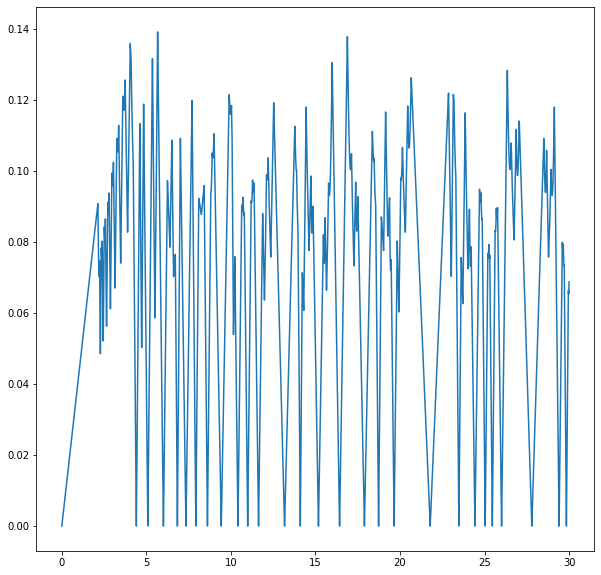

**********
Los ángulos con los errores mínimos son:
	0.000 : 0.00000
	2.281 : 0.04859
	4.409 : 0.00002
	5.086 : 0.00002
	6.009 : 0.00001
	6.836 : 0.00002
	7.341 : 0.00000
	7.926 : 0.00002
	8.613 : 0.00002
	9.430 : 0.00000
	10.417 : 0.00002
	10.993 : 0.00001
	11.635 : 0.00002
	13.174 : 0.00001
	14.105 : 0.00003
	15.178 : 0.00001
	16.426 : 0.00001
	17.897 : 0.00001
	18.734 : 0.00000
	19.653 : 0.00002
	21.787 : 0.00000
	23.483 : 0.00002
	24.433 : 0.00000
	25.040 : 0.00002
	25.461 : 0.00002
	26.008 : 0.00001
	27.796 : 0.00000
	29.409 : 0.00000
	29.842 : 0.00001


([[0.0, 0.0],
  [2.2811, 0.048589896733189926],
  [4.4085, 2.4908431763281194e-05],
  [5.0858, 2.294408547387423e-05],
  [6.009, 6.825821305720053e-06],
  [6.836, 2.339300588017563e-05],
  [7.341, 2.3227215594502795e-06],
  [7.9265, 1.6042781888124883e-05],
  [8.6132, 1.8756598296649638e-05],
  [9.43, 2.0484672658874467e-06],
  [10.4174, 1.5520873786978022e-05],
  [10.9927, 1.4711878976407943e-05],
  [11.6351, 1.7723793255499224e-05],
  [13.1736, 9.075872374974856e-06],
  [14.1054, 2.760174227106412e-05],
  [15.1782, 5.881689086491802e-06],
  [16.4264, 6.380424170252745e-06],
  [17.8966, 1.1587693725978361e-05],
  [18.734, 1.1338184790071062e-06],
  [19.6529, 1.7447236506196664e-05],
  [21.7868, 1.2057868294602272e-06],
  [23.4831, 2.0665147457595145e-05],
  [24.4327, 8.088997066720349e-07],
  [25.0397, 1.9844205812814418e-05],
  [25.4611, 2.2304087847717838e-05],
  [26.0078, 9.041026131408188e-06],
  [27.7958, 4.223128418304322e-06],
  [29.4093, 4.7802528581958735e-06],
  [29.8417, 1.

In [72]:
s1.analyze(rangeOfAngleSearch=(0.0,30.0), precision=4)

In [56]:
r1 = grafeno()
#r2 = grafeno3().mRot(13.17355)
r2 = grafeno3().mRot(13.15)

In [22]:
lor=calculaPares(r1,r2,eps=0.3)

In [23]:
l=top(lor)

In [24]:
muestra(l,r1,r2)

Mejores candidatos para Super-Red:'R1=Grafeno',R2='Grafeno(s3)(rot 13.17355°)'

+-----------+-----------+-----------+-----------------------+-----------------------+-----------+
| # de Atms |     T1    |     T2    | Tención/Rotación Red1 | Tención/Rotación Red2 |    Err    |
+-----------+-----------+-----------+-----------------------+-----------------------+-----------+
|     76    | |  3   2| | |  2   3| |         -0.0%         |         -0.0%         | 2.055e-07 |
|           | | -2   5| | | -3   5| |          0.0°         |          0.0°         |           |
|           |           |           |                       |                       |           |
|    228    | |  1   7| | | -1   8| |         -0.0%         |         -0.0%         |  3.56e-07 |
|           | | -7   8| | | -8   7| |          0.0°         |          0.0°         |           |
|           |           |           |                       |                       |           |
|    304    | |  6   4| | |  4   6| | 

1

In [18]:
p1=m2V(r1.a,r1.b,(3,-2))
p2=m2V(r1.a,r1.b,(2,5))

In [20]:
ajusta(r1,r2,)

In [26]:
r3=superMesh(p1,p2,[r1,r2])

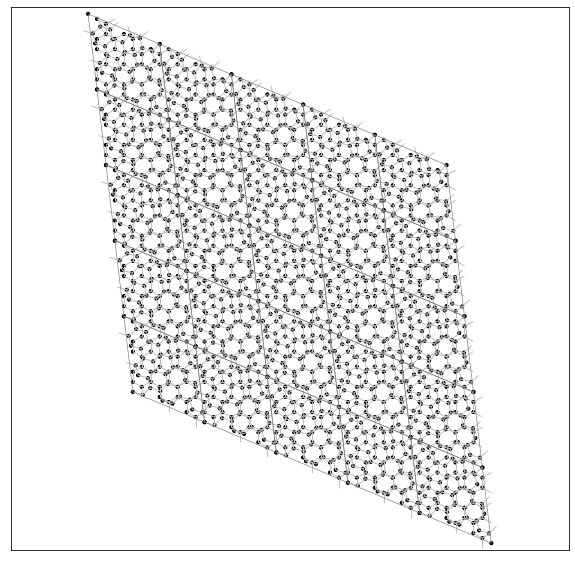

1

In [27]:
r3.showXY(5,5)

In [36]:
rx=superMesh((50,0),(0,50),[r1,r2])
ry=superMesh((50,0),(0,50),[r3,rx])

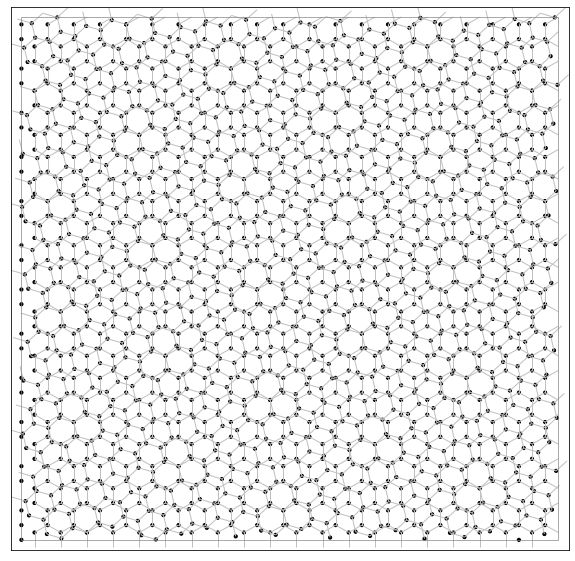

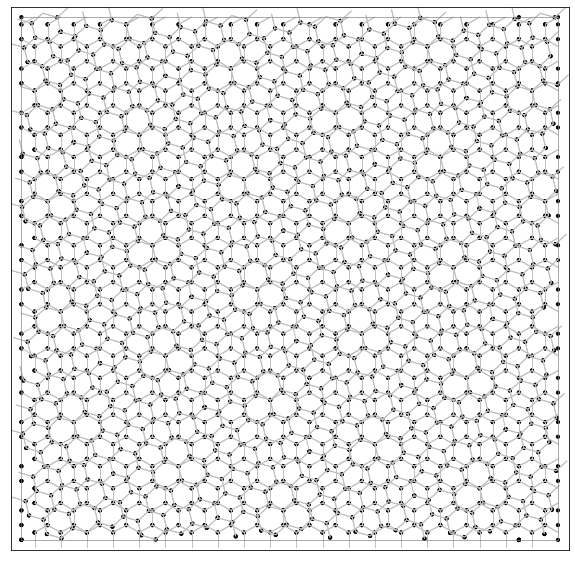

In [37]:
rx.showme()
ry.showme()

In [60]:
analiza?

In [70]:
r1.theta

0.0